In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
data = pd.read_csv("/content/spotify dataset.csv")


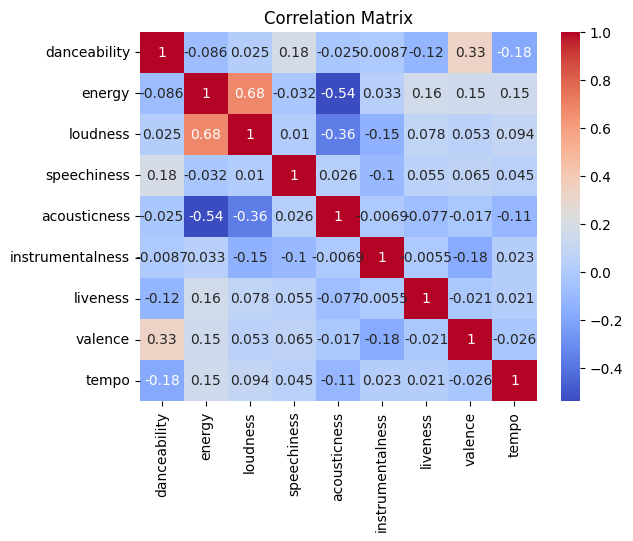

In [ ]:
# Correlation matrix
corr_matrix = data[['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


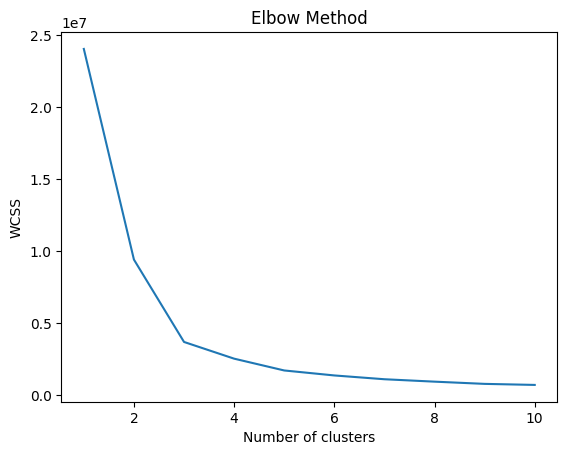

In [ ]:
# Clustering
X = data[['danceability', 'energy', 'loudness', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Elbow method to find the optimal number of clusters
#The Elbow Method is a technique used to determine the optimal number of clusters in a dataset for a K-means clustering algorithm.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

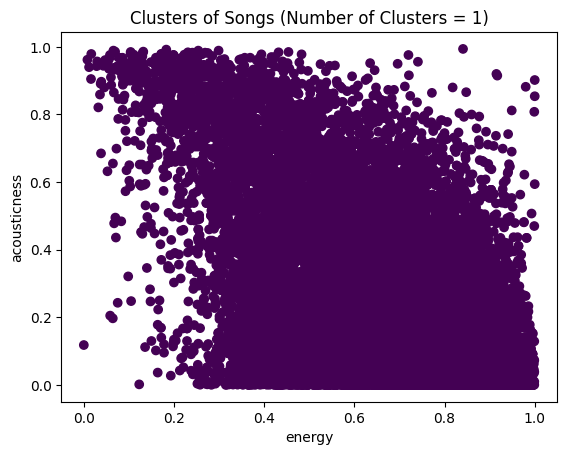

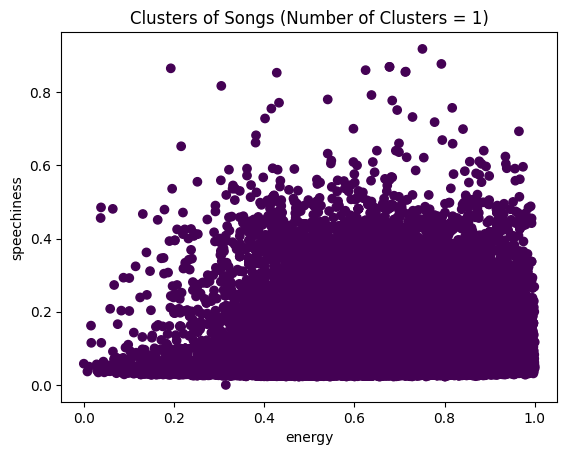

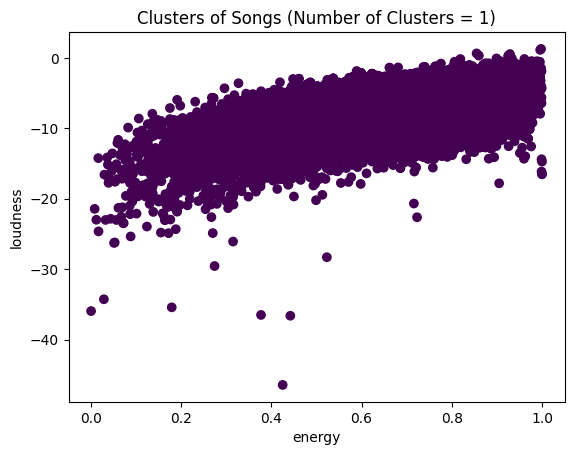

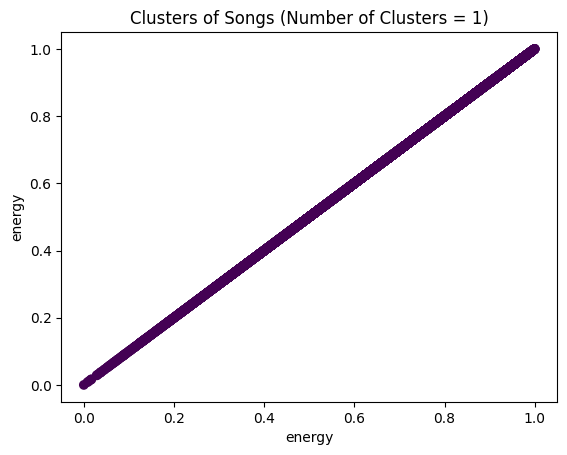

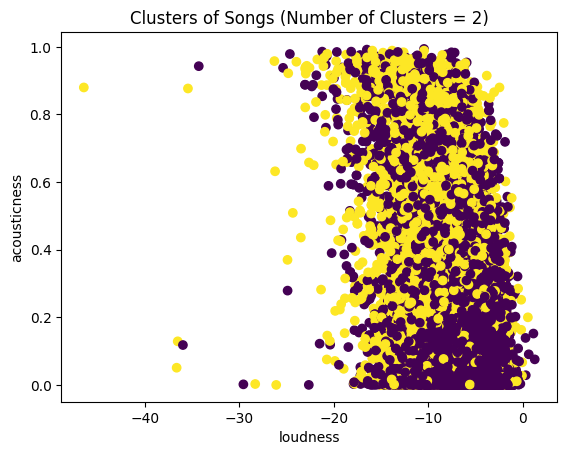

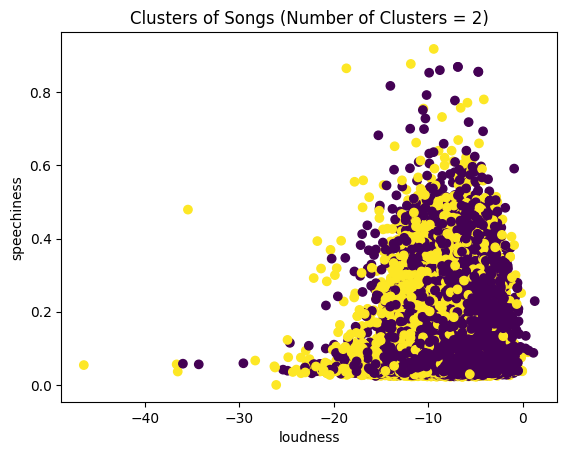

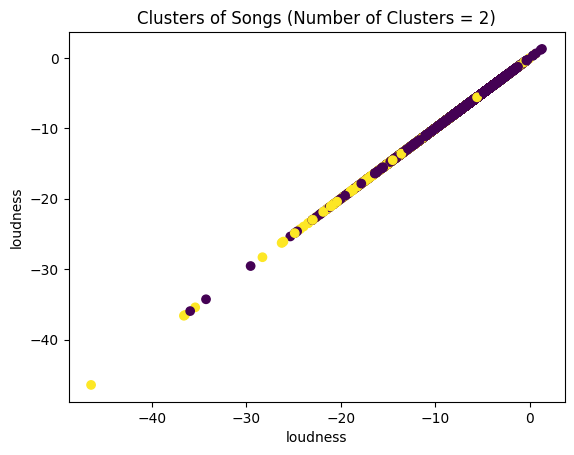

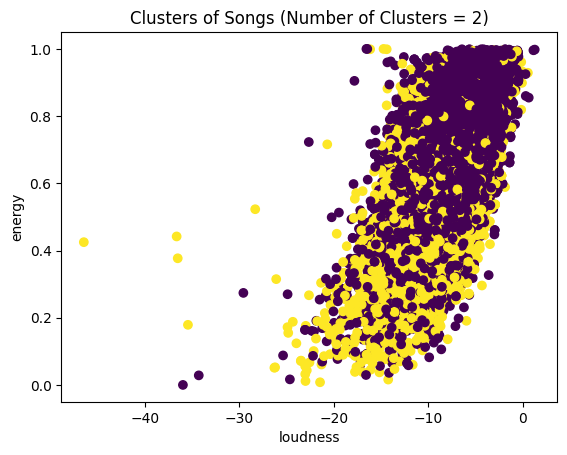

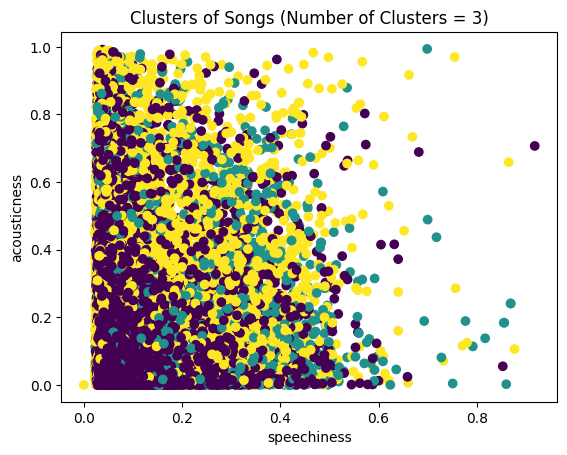

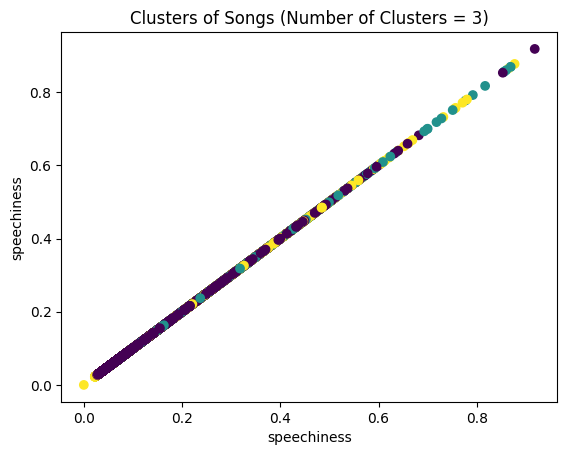

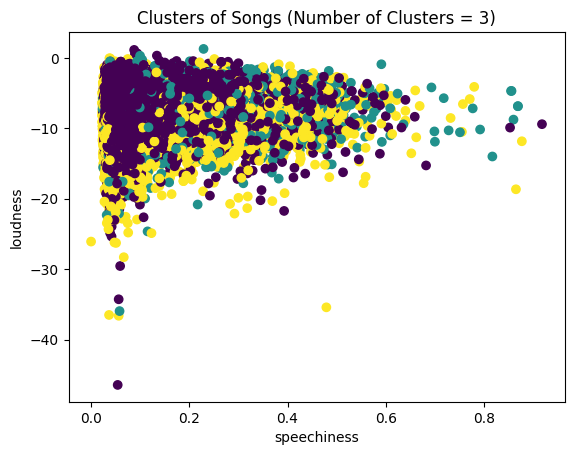

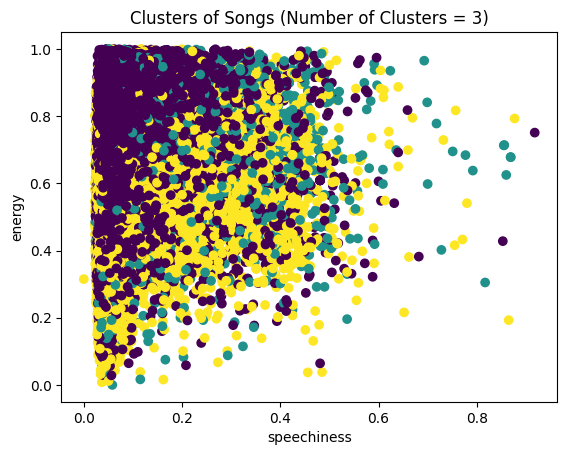

In [ ]:
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i in range(1, 4):#i have taken 4
    for j in range(4, 0, -1):
        n_clusters = i
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        data['cluster'] = kmeans.fit_predict(X)

        # Visualize clusters for the current pair of features
        plt.scatter(X[features[i]], X[features[j]], c=data['cluster'], cmap='viridis')
        plt.title(f'Clusters of Songs (Number of Clusters = {n_clusters})')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.show()


Going to Build a Model


In [ ]:

# Create features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, data['cluster'], test_size=0.2, random_state=42)
#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

#predictions
y_pred = rf_classifier.predict(X_test)
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.0
Confusion Matrix:
[[3131    0    0]
 [   0 1009    0]
 [   0    0 2427]]


In [ ]:

# Save the model for future use
import joblib
joblib.dump(rf_classifier, 'spotify_recommendation_model.pkl')

['spotify_recommendation_model.pkl']

In [ ]:
#from this the recommendation system can be built based on this clustering model.

In [ ]:
# Load the saved model
loaded_model = joblib.load('spotify_recommendation_model.pkl')

# recommend songs based on user preferences
def recommend_songs(user_preferences, scaler, data, user_playlist_songs=[]):
    user_preferences_scaled = scaler.transform([user_preferences])


    user_cluster = loaded_model.predict(user_preferences_scaled)[0]# Predict the cluster for the user preferences


    cluster_songs = data[data['cluster'] == user_cluster] # Filter the data for songs in the predicted cluster

    # Exclude songs already in the user's playlist
    if user_playlist_songs:
        cluster_songs = cluster_songs[~cluster_songs['track_id'].isin(user_playlist_songs)]

    # Recommend top N songs from the cluster
    top_recommendations = cluster_songs.sample(n=5)

    return top_recommendations[['track_name', 'track_artist', 'playlist_name']]

#User preferences (scaled features)
user_preferences = [0.7, 0.8, -2.0, 0.1, 0.2, 0.0, 0.5, 0.6, 110.0]


Note : the cell below explains all the user preference data which i used.

In [ ]:
#0.7: Danceability - A measure of how suitable a track is for dancing based on a combination of musical elements.
#0.8: Energy - Represents intensity.
#-2.0: Loudness - loudness of a track in decibels.in here is is quieter
#0.1: Speechiness - Speechiness detects the presence of spoken words in a track. The closer to 1.0, the more likely the track contains speech.
#0.2: Acousticness - A higher value indicates a higher confidence in the track being acoustic.
#0.0: Instrumentalness -  whether a track contains no vocals.
#0.5: Liveness - Detects the presence of an audience in the recording. A higher value represents being performed live.
#0.6: Valence - A measure of musical positiveness. Tracks with high valence sound more positive.
#110.0: Tempo - The overall estimated tempo of a track in beats per minute (BPM).

In [ ]:

#User's existing playlist
user_playlist_songs = ['1z1Hg7Vb0AhHDiEmnDE79l', '2OAylPUDDfwRGfe0lYqlCQ', '3eFJI470ALf1EYjywPRsJy']  #track IDs
scaler = StandardScaler()
scaled_user_preferences = scaler.fit_transform([user_preferences])

# Get recommendations for the user,excluding songs from their playlist
recommendations = recommend_songs(scaled_user_preferences[0], scaler, data, user_playlist_songs)

# Display recommendations
print("Top Recommendation For Adhvik:")
print(recommendations)


Top Recommendations:
                   track_name   track_artist     playlist_name
19285          Quiero Repetir          Ozuna  Reggaeton Rewind
24419            Hey Mr. D.J.          Zhané     New Jack City
8368   Equipped in This Game?    Pastor Troy  Southern Hip Hop
7900    No Church In The Wild          JAY-Z    Hip-Hop 'n RnB
2249                    R.E.M  Ariana Grande     Post Teen Pop


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
